In [57]:
from datetime import datetime
# !pip install pandas numpy matplotlib scikit-learn seaborn
from pathlib import Path
import pandas as pd
from _config import PROJECT_ROOT, FILE_PROCESSED_DTU_SOLAR_STATION

In [59]:
# Load the pickle file to verify the content
df = pd.read_pickle(FILE_PROCESSED_DTU_SOLAR_STATION)
df.head()

,GHI,DNI,DHI,LWD,wind_speed_avg,wind_dir_avg,air_temperature,air_pressure,relative_humidity,rain_accumulation,rain_duration,rain_intensity,solar_altitude
Time(utc),,,,,,,,,,,,,
2020-01-01 00:00:00,-2.725,-0.631118,-2.718,253.674819,1.7,283.0,3.4,1023.0,83.0,0.0,0.0,0.0,-56.132361
2020-01-01 00:01:00,-2.776,-0.595784,-2.749,253.775029,1.3,260.0,3.3,1023.0,82.9,0.0,0.0,0.0,-56.084576
2020-01-01 00:02:00,-2.673,-0.568635,-2.724,253.775018,3.5,295.0,3.4,1023.0,83.2,0.0,0.0,0.0,-56.035863
2020-01-01 00:03:00,-2.356,-0.541486,-2.504,253.674755,2.2,290.0,3.4,1023.0,83.5,0.0,0.0,0.0,-55.986226
2020-01-01 00:04:00,-2.468,-0.724344,-2.529,253.875054,1.5,285.0,3.5,1023.0,83.1,0.0,0.0,0.0,-55.935669


<Axes: xlabel='Time(utc)'>

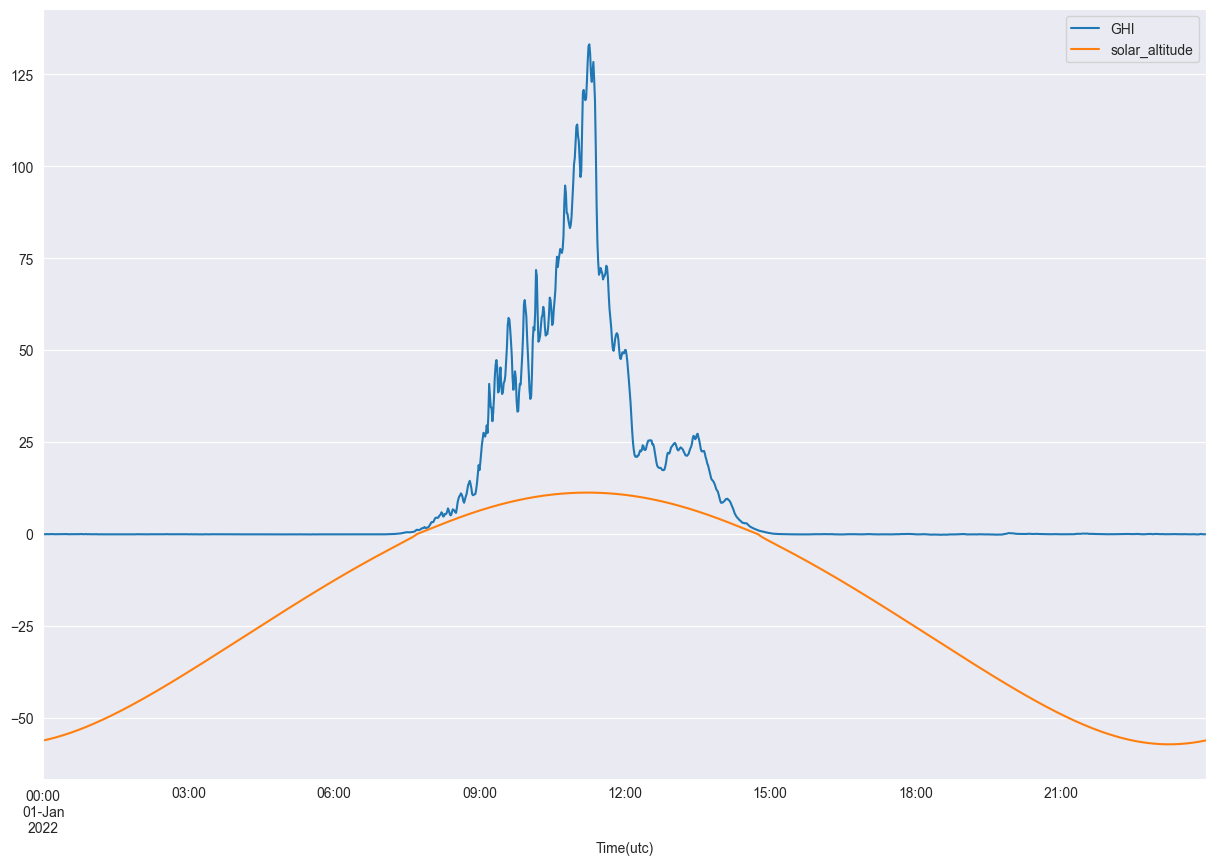

In [60]:
# get data from date given index is datetime
day = df.loc['2022-01-01']
# plot GHI and solar altitude together
day[['GHI', 'solar_altitude']].plot(subplots=False, figsize=(15, 10))


In [61]:
display(df.describe().round(3), df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2630880 entries, 2020-01-01 00:00:00 to 2025-01-01 08:04:00
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   GHI                float64
 1   DNI                float64
 2   DHI                float64
 3   LWD                float64
 4   wind_speed_avg     float64
 5   wind_dir_avg       float64
 6   air_temperature    float64
 7   air_pressure       float64
 8   relative_humidity  float64
 9   rain_accumulation  float64
 10  rain_duration      float64
 11  rain_intensity     float64
 12  solar_altitude     float64
dtypes: float64(13)
memory usage: 281.0 MB


,GHI,DNI,DHI,LWD,wind_speed_avg,wind_dir_avg,air_temperature,air_pressure,relative_humidity,rain_accumulation,rain_duration,rain_intensity,solar_altitude
count,2560838.000,2536356.000,2535319.000,2480221.000,2569890.000,2569890.000,2569681.000,2569853.000,2569853.000,2569890.000,2569890.000,2569890.000,2630880.000
mean,120.567,128.234,57.412,856.769,2.633,203.978,10.097,1007.257,72.684,0.001,2.101,0.065,0.387
std,209.785,266.978,92.852,10886.152,1.766,89.900,6.498,10.857,14.129,0.014,10.164,0.826,28.005
min,-9.758,-12.520,-23.610,-7.325,0.000,0.000,-9.700,958.200,16.700,0.000,0.000,0.000,-57.644
25%,-1.226,-0.309,-1.163,293.258,1.300,123.000,4.900,1001.000,64.100,0.000,0.000,0.000,-19.651
50%,2.992,-0.019,3.613,324.782,2.300,232.000,9.700,1008.000,76.400,0.000,0.000,0.000,0.724
75%,152.075,14.719,84.620,349.984,3.500,273.000,15.100,1015.000,84.000,0.000,0.000,0.000,20.562
max,1259.000,1001.190,868.100,311300.000,22.500,359.000,31.600,1044.000,92.500,1.850,110.000,115.400,57.658


None

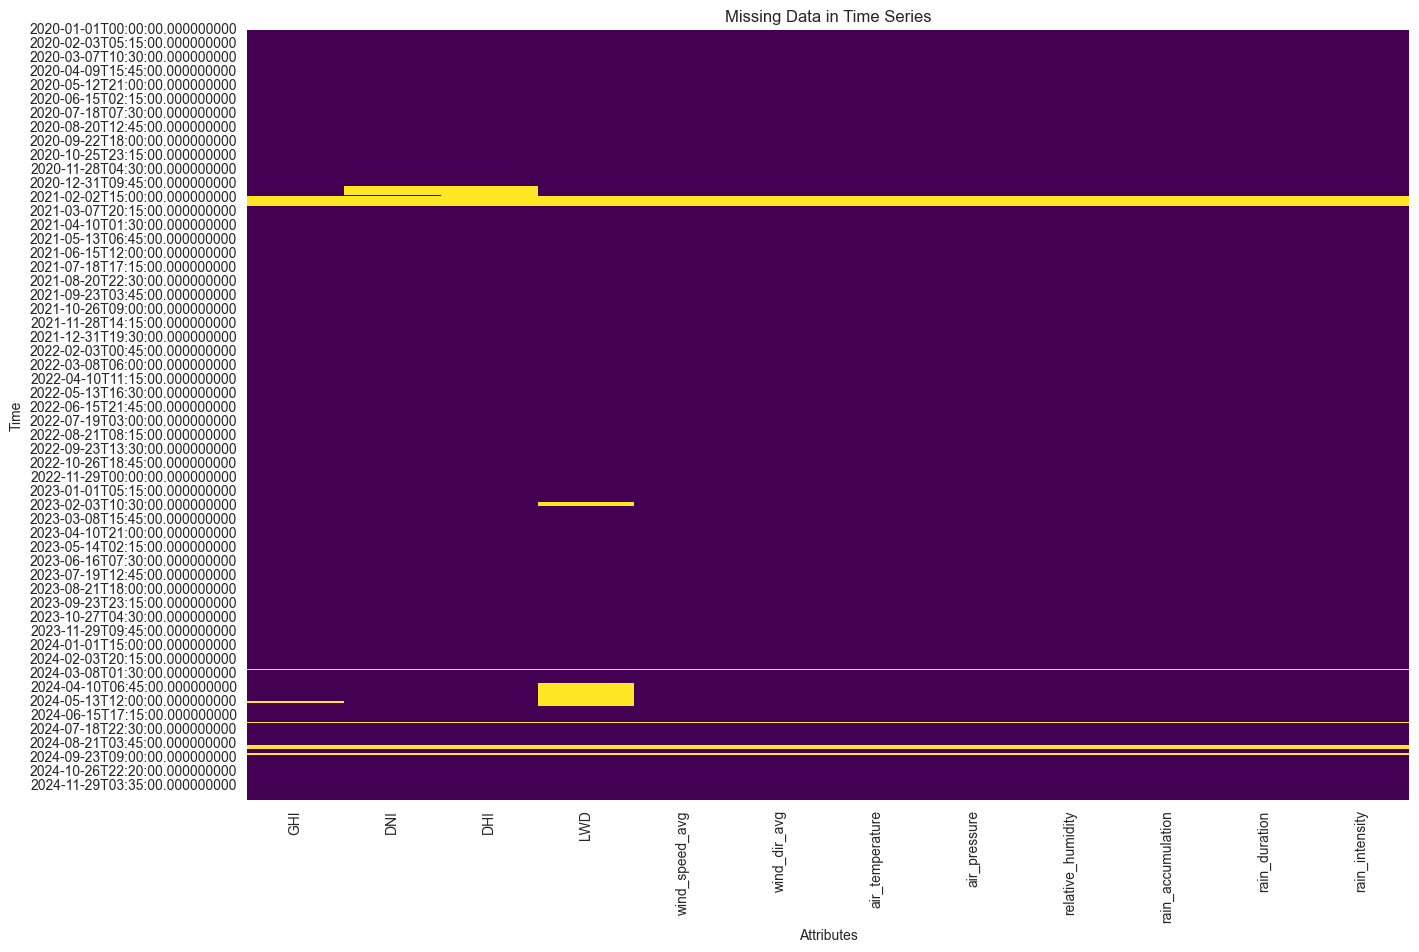

In [9]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a boolean DataFrame indicating where values are missing
missing_data = df.isnull()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(missing_data, cbar=False, cmap='viridis')
plt.title('Missing Data in Time Series')
plt.xlabel('Attributes')
plt.ylabel('Time')
plt.show()

In [10]:
missing_timestamps = df[df.isnull().any(axis=1)].index
print(missing_timestamps)

DatetimeIndex(['2020-01-02 11:32:00', '2020-01-16 11:31:00',
               '2020-01-30 11:31:00', '2020-02-13 11:30:00',
               '2020-02-24 12:45:00', '2020-02-27 11:29:00',
               '2020-03-05 19:30:00', '2020-03-12 11:29:00',
               '2020-04-09 11:27:00', '2020-04-09 11:28:00',
               ...
               '2024-12-03 14:20:00', '2024-12-03 14:21:00',
               '2024-12-03 14:29:00', '2024-12-03 14:30:00',
               '2024-12-03 14:31:00', '2024-12-03 14:32:00',
               '2024-12-03 14:33:00', '2024-12-03 14:34:00',
               '2024-12-04 15:43:00', '2024-12-04 15:44:00'],
              dtype='datetime64[ns]', name='Time(utc)', length=186462, freq=None)


In [11]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

<Figure size 1500x1000 with 0 Axes>

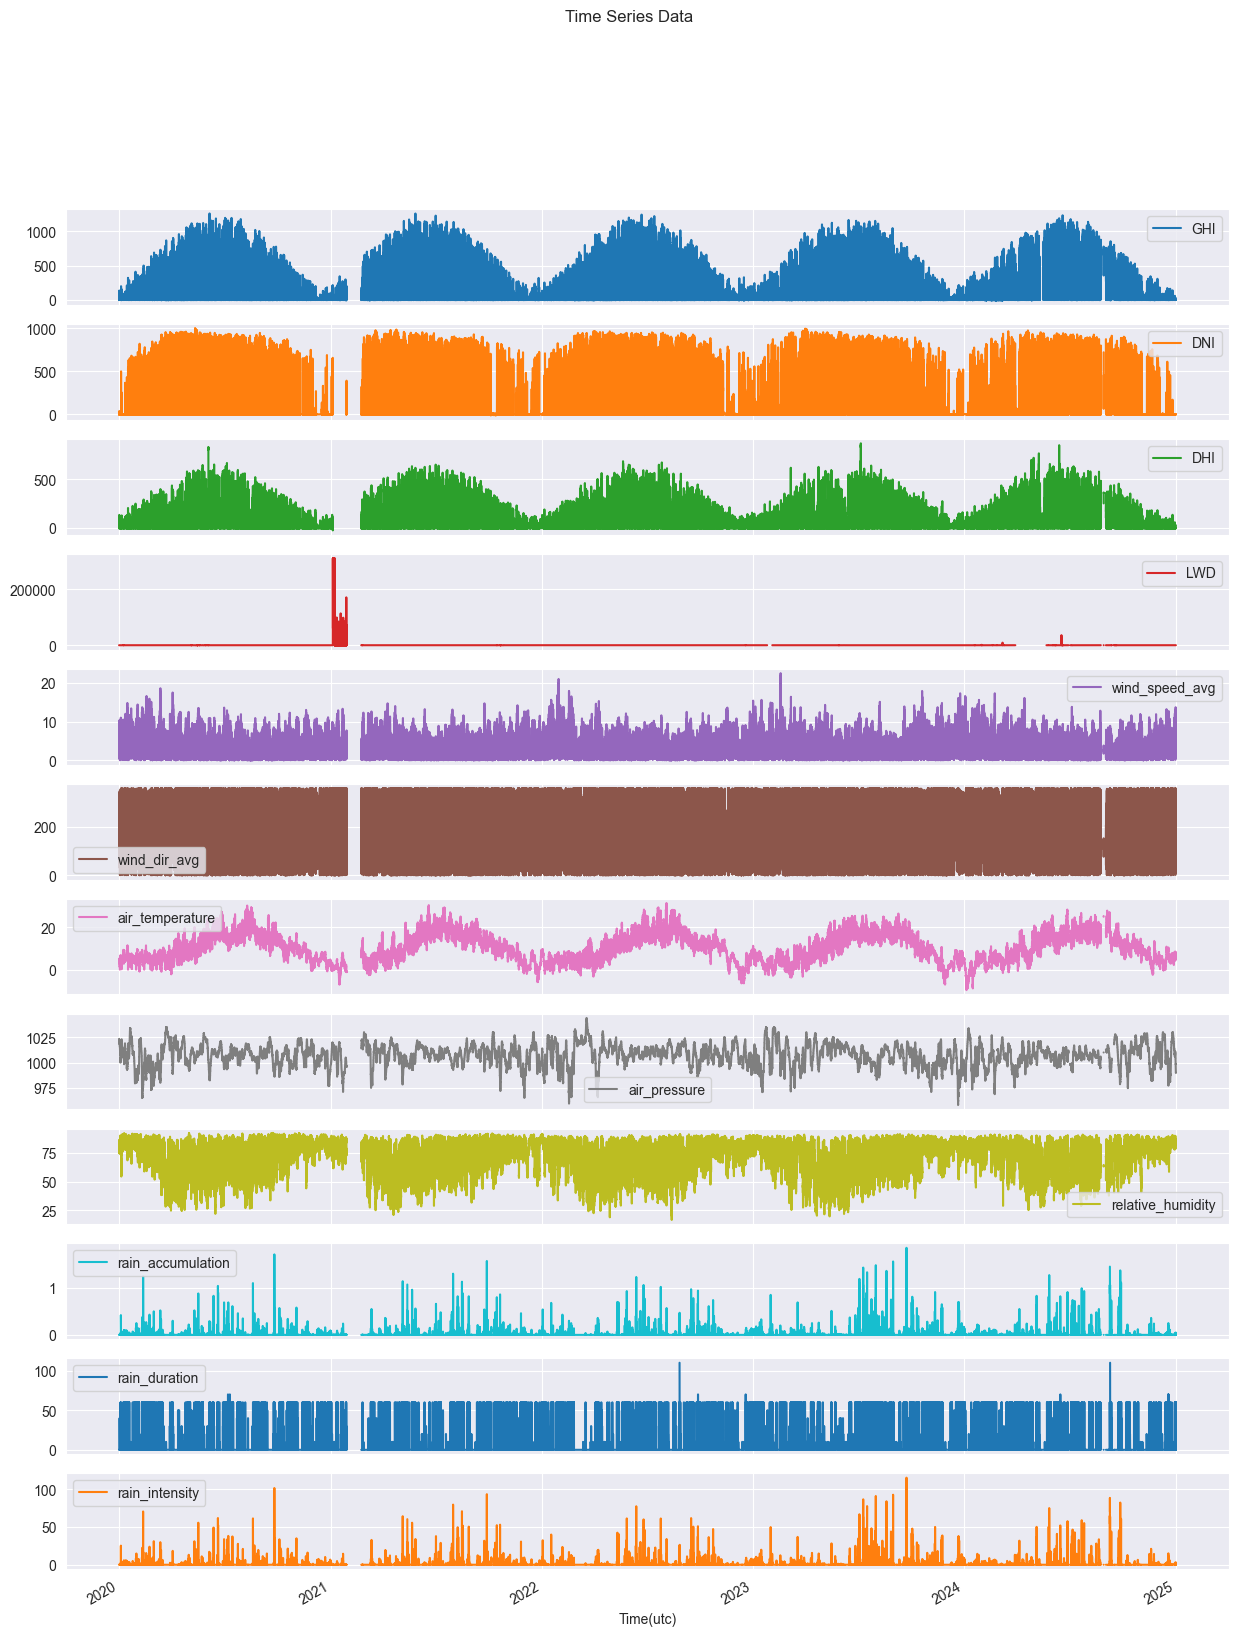

In [12]:
# Plotting the time series data
plt.figure(figsize=(15, 10), layout='constrained')
df.plot(subplots=True, figsize=(15, 20), title='Time Series Data')
plt.show()

In [13]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

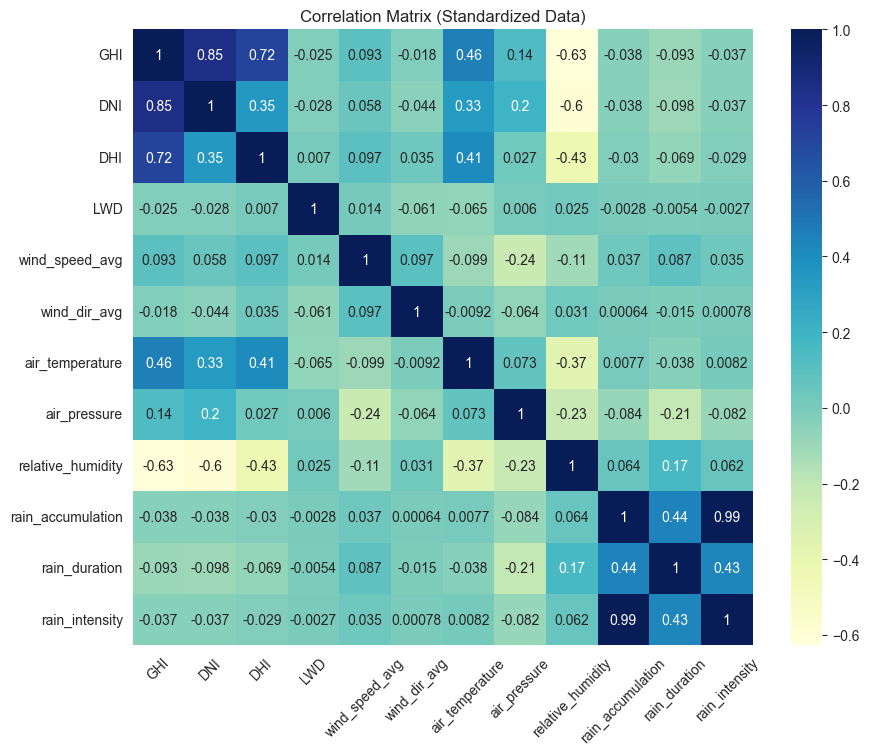

In [14]:
import seaborn as sns

corr_std = df_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_std, annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix (Standardized Data)")
plt.xticks(rotation=45)
plt.show()

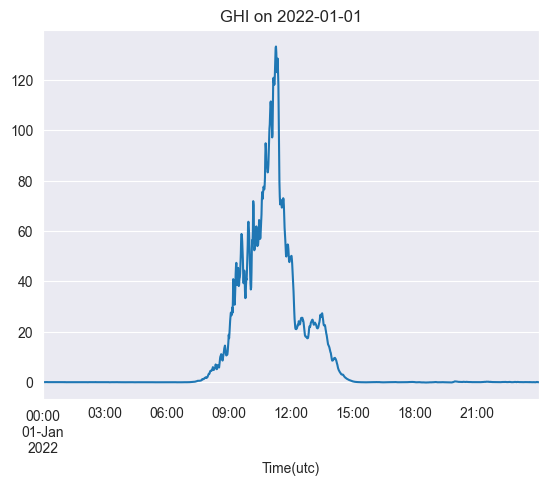

In [15]:
# select random date and plot the GHI
date = '2022-01-01'
df.loc[date, 'GHI'].plot()
plt.title(f'GHI on {date}')
plt.show()


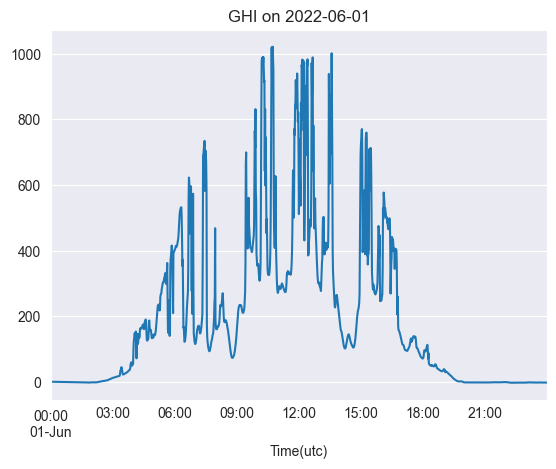

In [16]:
# select random date and plot the GHI
date = '2023-03-01'
df.loc[date, 'GHI'].plot()
plt.title(f'GHI on {date}')
plt.show()

In [2]:
from astral import LocationInfo
city = LocationInfo("London", "England", "Europe/London", 51.5, -0.116)
city

LocationInfo(name='London', region='England', timezone='Europe/London', latitude=51.5, longitude=-0.116)

In [3]:
from astral import LocationInfo
from astral.sun import sun
import datetime

# Create a custom location for DTU Lyngby (Building 119)
location = LocationInfo(
    name="DTU Lyngby (Building 119)",
    region="Denmark",
    timezone="Europe/Copenhagen",
    latitude=55.79064,
    longitude=12.52505,
)
# Set elevation (if needed for further calculations)
location.elevation = 50  # 50 meters AMSL

# Display the location details
print(f"Location: {location.name}")
print(f"Region: {location.region}")
print(f"Timezone: {location.timezone}")
print(f"Latitude: {location.latitude}")
print(f"Longitude: {location.longitude}")
print(f"Elevation: {location.elevation} m AMSL\n")

# Calculate today's sunrise and sunset times for the location
s = sun(location.observer, date=datetime.date.today())

print("Sunrise:", s['sunrise'])
print("Sunset:", s['sunset'])


Location: DTU Lyngby (Building 119)
Region: Denmark
Timezone: Europe/Copenhagen
Latitude: 55.79064
Longitude: 12.52505
Elevation: 50 m AMSL

Sunrise: 2025-03-08 05:43:14.764334+00:00
Sunset: 2025-03-08 16:59:01.540876+00:00


In [30]:
from astral import LocationInfo, Observer
s# Create a custom location for DTU Lyngby (Building 119)
location = LocationInfo(
    name="DTU Lyngby (Building 119)",
    region="Denmark",
    # timezone="Europe/Copenhagen",
    latitude=55.79064,
    longitude=12.52505,
)
observer = Observer(location.latitude, location.longitude, 50) # 50 meters AMSL

In [25]:
from astral.sun import elevation

# Compute the solar elevation angle (in degrees) for the given observer and time
solar_altitude = elevation(observer, now)

# Calculate the solar zenith angle (90° - solar altitude)
solar_zenith = 90 - solar_altitude

print("Current time:", now)
print("Solar Altitude (Elevation):", solar_altitude, "degrees")
print("Solar Zenith Angle:", solar_zenith, "degrees")


Current time: 2025-03-08 07:12:13.910148
Solar Altitude (Elevation): 11.23981323297528 degrees
Solar Zenith Angle: 78.76018676702472 degrees


In [28]:
location.observer, observer

(Observer(latitude=55.79064, longitude=12.52505, elevation=0.0),
 Observer(latitude=55.79064, longitude=12.52505, elevation=50.0))